<a href="https://colab.research.google.com/github/kota-Git/IPL_T20_Cricket_Analysis/blob/main/IPL_T20_Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

Cricket is the favourite sport in India and almost everyone loves to watch it, lets deep dive into IPL seasons dataset and get interesting insights of teams and and players across the season..

In [ ]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (20,10)
%matplotlib inline

In [ ]:
# Mounting the drive to get the data files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading files and reading using pandas.read_csv()

working_dir = "/content/drive/MyDrive/IPL T20 Cricket Analysis/IPL Data/"

deliveries_df = pd.read_csv(working_dir + "deliveries.csv")
matches_df = pd.read_csv(working_dir + "matches.csv")
teams_df = pd.read_csv(working_dir + "teams.csv")
avg_strikerate_df = pd.read_csv(working_dir + "most_runs_average_strikerate.csv")
teamwise_home_and_away_df=pd.read_csv(working_dir + "teamwise_home_and_away.csv")
players_df=pd.read_excel(working_dir + "Players.xlsx")

# Basic Inspection

What??

Yes, Inspection!!

Knowing and understanding your datasets is very important in EDA. So, we will have a look on the datasets available with us for this EDA.

## Deliveries

We have this deliveries dataset with us that contains ballwise summary for each inning for each match!!

Interesting!! huhh?

In [ ]:
# checking the content of the dataset using head() as this will give top 5 records

deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
# checking null, non-null and basic info of how our dataset is!

deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Matches

Matches data require some preprocessing with the team names.

Some teams have played different seasons with different names.

For sake of consistency , we are going to use only one name for a team.

In [ ]:
# replacing the old team names with the new ones

matches_df = matches_df.replace('Rising Pune Supergiant','Rising Pune Supergiants') # error in dataframe name
matches_df = matches_df.replace('Pune Warriors','Rising Pune Supergiants')
matches_df = matches_df.replace('Delhi Daredevils','Delhi Capitals')
matches_df = matches_df.replace('Deccan Chargers','Sunrisers Hyderabad')


In [ ]:
# have a look at the head

matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
# getting basic info

matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## Teamwise Home and Away

Again needs some preprocessing of data for the sake of consistency.

In [ ]:
# this is another dataset, so we have to rename here as well!

teamwise_home_and_away_df = teamwise_home_and_away_df.replace('Rising Pune Supergiant','Rising Pune Supergiants')  
teamwise_home_and_away_df = teamwise_home_and_away_df.replace('Pune Warriors','Rising Pune Supergiants')
teamwise_home_and_away_df = teamwise_home_and_away_df.replace('Delhi Daredevils','Delhi Capitals')
teamwise_home_and_away_df = teamwise_home_and_away_df.replace('Deccan Chargers','Sunrisers Hyderabad')


In [ ]:
# head() is damn useful!!

teamwise_home_and_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiants,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [ ]:
# give me the info

teamwise_home_and_away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


## Teams

In [ ]:
teams_df.head()

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions


In [ ]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


## Average Strikerate

In [ ]:
avg_strikerate_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [ ]:
avg_strikerate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


## Players

In [ ]:
players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [ ]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


# Interesting Insights

Follow us, to get some amazing insights !! 

### Insights about Players !!

### Best Fielder in IPL

Considering it to be catches, run outs !!

In [ ]:
# most no of catches, getting top 5

deliveries_df[deliveries_df['dismissal_kind'] == 'caught'].fielder.value_counts()[:5]

KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
Name: fielder, dtype: int64

In [ ]:
# getting top 5 who did most number of run outs

deliveries_df[deliveries_df['dismissal_kind'] == 'run out'].fielder.value_counts()[:5]

MS Dhoni          23
RA Jadeja         20
V Kohli           17
SK Raina          16
AB de Villiers    14
Name: fielder, dtype: int64

In [ ]:
# counting run outs and catches together

field_dismissals = deliveries_df[deliveries_df['dismissal_kind'].isin(['caught', 'run out'])].fielder.value_counts()

# getting top 5

field_dismissals[:5]

KD Karthik        123
MS Dhoni          121
SK Raina          115
AB de Villiers    107
RV Uthappa         93
Name: fielder, dtype: int64

*MS Dhoni and Dinesh Karthik are wicket keepers so they have an advantage while catching and executing a run out.*

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

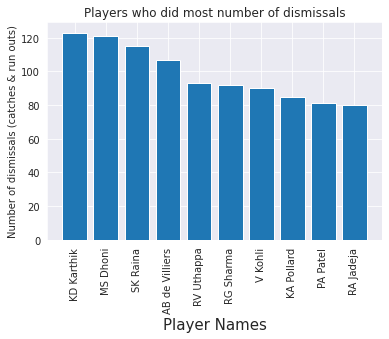

In [ ]:
# creating bar plot for top 10

plt.bar(field_dismissals[:10].index, field_dismissals[:10])
plt.title("Players who did most number of dismissals")
plt.xlabel("Player Names" , fontsize = 15)
plt.ylabel("Number of dismissals (catches & run outs)")
plt.xticks(rotation=90) #this will rotate the names coming in x axis for each bar (as bydefault it is horizontal)

So, it's obvious that Suresh Raina with 99 catches and 16 run outs can be considered as a best fielder.

*Mr. IPL for a reason!*

### Maximum Man of Match (MOM) winner across seasons !!

He should be rich enough by now!!



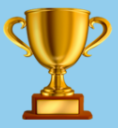



In [ ]:
# getting number of MOM trophies against each player

max_mom = matches_df['player_of_match'].value_counts()  # CH Gayle has been Man of the Match for the most 
max_mom

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
RS Bopara          1
JEC Franklin       1
TL Suman           1
SW Billings        1
SB Wagh            1
Name: player_of_match, Length: 226, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

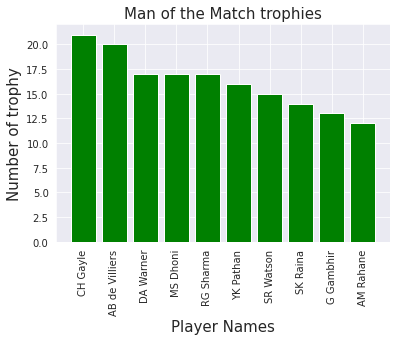

In [ ]:
# creating bar plot for top 10

plt.bar(max_mom[:10].index, max_mom[:10] , color = "green")
plt.title("Man of the Match trophies" , fontsize = 15)
plt.xlabel("Player Names" , fontsize = 15)
plt.ylabel("Number of trophy", fontsize = 15)
plt.xticks(rotation=90)


*AB de Villers be like: "Man! don't forget me !!*

# Orange cap holders !!

The IPL Orange Cap is an award which is given annually to the leading run-scorer in the IPL season!!

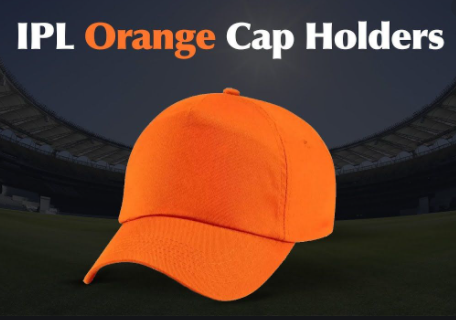

In [ ]:
#let us start by making a new dataframe with only two columns of matches dataframe which can be merged with deliveries data frame  

new_match_df = matches_df[["id",'Season']]


In [ ]:
#using merge operation  on the match id columns of deliveries dataframe and id column of new_matches_df dataframe

new_deliveries_df = pd.merge(deliveries_df,new_match_df , left_on= "match_id",right_on ="id")

In [ ]:
# grouping by season

ipl_season = new_deliveries_df.groupby("Season")

In [ ]:
# creating a function which will give the team of orange cap holder player by inputting season

def get_orange_cap(season):
  ''' This function takes season (in string form) as an input and returns the team of the player who holds the orange cap for that season'''

  season = season.upper()
  s= ipl_season.get_group(season)
  max_runs = s.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending =False).reset_index()
  top_scores= max_runs.loc[0,"batsman"]
  runs = max_runs.loc[0,"batsman_runs"]
  team_name = s[s["batsman"]==top_scores]["batting_team"][0]
  return team_name
  

In [ ]:
# checking for any season, say 2017

get_orange_cap("IPL-2017")

'Sunrisers Hyderabad'

We can also find the top scorer in each season by using group by function


In [ ]:
# lets make a empty list which will be helpfull in making dataframe
orange_cap =[]

# Group by objects can be itaterd to get the datframe of each groupby

for season ,season_df in ipl_season:
  # season represent the name by which of group by has been done
  # season_df will give dataframe object with respect to that name

  # we are again performing group by on the season dataframe to group this datframe with batsman 
  max_runs = season_df.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending =False).reset_index()
 
  # find the top scorer from the recent created datframe
  top_scores= max_runs.loc[0,"batsman"]

  # sruns scored by that batsman
  runs = max_runs.loc[0,"batsman_runs"]

  # we also found the team which he belongs to
  team_name = season_df[season_df["batsman"]==top_scores]["batting_team"].iloc[0]

  # then we store all this data in dictionary
  dict_ ={"season":season,"Team":team_name,"Batsman":top_scores,"Runs":runs}

  # now we append this dictinary in the list
  orange_cap.append(dict_)
    # now oarnge cap list conatain dictinaries



**Now we have created a dataframe  with the use of list, which contain highest runs scorer from all season**

In [ ]:
# makinhg dataframe from list

orange_cap_df = pd.DataFrame(orange_cap)

# using background gradient to color on basis of highest values 

orange_cap_df.style.background_gradient(cmap="Blues")

,season,Team,Batsman,Runs
0,IPL-2008,Kings XI Punjab,SE Marsh,616
1,IPL-2009,Chennai Super Kings,ML Hayden,572
2,IPL-2010,Mumbai Indians,SR Tendulkar,618
3,IPL-2011,Royal Challengers Bangalore,CH Gayle,608
4,IPL-2012,Royal Challengers Bangalore,CH Gayle,733
5,IPL-2013,Chennai Super Kings,MEK Hussey,733
6,IPL-2014,Kolkata Knight Riders,RV Uthappa,660
7,IPL-2015,Sunrisers Hyderabad,DA Warner,562
8,IPL-2016,Royal Challengers Bangalore,V Kohli,973
9,IPL-2017,Sunrisers Hyderabad,DA Warner,641


**Now by ploting the scatter gragh we can see which team has maximum orange cap holder**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

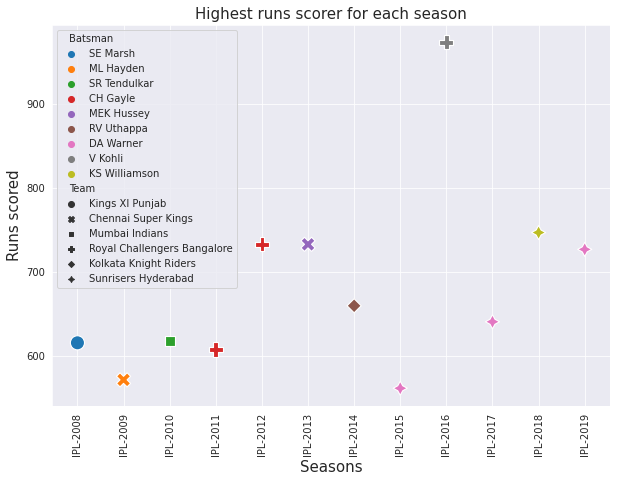

In [ ]:
# use rcParam to fix the size of the plot

plt.rcParams['figure.figsize']= (10,7)
sns.set_style("darkgrid")

# used scattered plot to plot to plot the data with the use of hue and style

sns.scatterplot(data=orange_cap_df,x="season",y="Runs",hue ="Batsman",s=200,style="Team")
plt.title("Highest runs scorer for each season" , fontsize = 15)
plt.xlabel("Seasons" , fontsize = 15)
plt.ylabel("Runs scored" , fontsize = 15)
plt.xticks(rotation = 90)



*ohhh!! by looking in the plot we can see that Sunriser Hyderabad is consistently having the highest scorer in their team from last 3 IPL season*

### Maximum number of centuries by any player

In [ ]:
# grouping by match id and batsman as it is ball by ball records and performing agg on runs

century = deliveries_df.groupby(["match_id" , "batsman"]).agg({"batsman_runs" : "sum"})
century.head()

batsman_runs
match_id batsman                  
1        A Choudhary             6
         BCJ Cutting            16
         CH Gayle               32
         DA Warner              14
         DJ Hooda               16

In [ ]:
count_of_centuries = century[century["batsman_runs"] >= 100].groupby(["batsman"]).count().sort_values("batsman_runs" , ascending = False).reset_index().rename(columns = {"batsman_runs" : "count_of_centuries"})
count_of_centuries.head()

,batsman,count_of_centuries
0,CH Gayle,7
1,V Kohli,5
2,DA Warner,4
3,SR Watson,4
4,AB de Villiers,3


In [ ]:
#Just highlighting the max value (although it is sorted, doesn't add much value here)
count_of_centuries.head().style.highlight_max(color="cyan")

,batsman,count_of_centuries
0,CH Gayle,7
1,V Kohli,5
2,DA Warner,4
3,SR Watson,4
4,AB de Villiers,3


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text major ticklabel objects>)

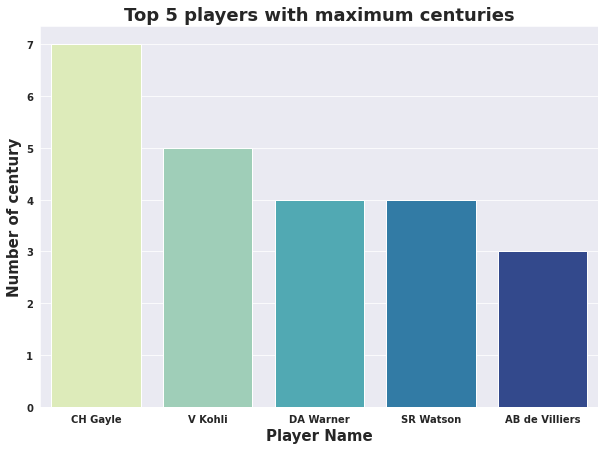

In [ ]:

# creating a plot to show the maximum number of centuries 
x_label = list(count_of_centuries.loc[: , "batsman"][0:5])
y_label = list(count_of_centuries.loc[: , "count_of_centuries"][0:5])

# Alternate way
sns.barplot(x= "batsman" , y="count_of_centuries" , data=count_of_centuries[0:5] , palette="YlGnBu")
plt.xlabel('Player Name', fontsize = 15, weight = 'bold')
plt.ylabel('Number of century', fontsize = 15, weight = 'bold')
plt.title("Top 5 players with maximum centuries" , fontsize = 18 , weight = "bold")
plt.xticks(weight = "bold")
plt.yticks(weight = "bold")


*Chris Gayle is a CHAMPION !!*

*Being on the top with the most number of 100's and lifting the MOM trophy maximum times!!*





### Most economical bowler

In [ ]:
# let's get list of all the bowlers
bowlers = list(set(deliveries_df['bowler']))

In [ ]:
# getting total runs conceeded by bowlers
# and putting it into dictionary
runs_conceeded = {bowler:runs for bowler,runs in zip(deliveries_df.groupby('bowler')['total_runs'].sum().index, deliveries_df.groupby('bowler')['total_runs'].sum())}

In [ ]:
# now making one more dictionary to store total deliveries by each bowler
balls_delivered = {bowler:balls for bowler,balls in zip(deliveries_df[deliveries_df['extra_runs']==0]['bowler'].value_counts().index, deliveries_df[deliveries_df['extra_runs']==0]['bowler'].value_counts())}

Here, we'll consider only bowlers who have bowled atleast 300 balls throughout all the seasons.

In [ ]:
# putting the condition that the bowler must have bowled atleast 300 bowls

economies = []

for bowler in bowlers:
    if balls_delivered[bowler]>300:
        economies.append(round(runs_conceeded[bowler]*6/balls_delivered[bowler],2))
    else:
        economies.append(0)

In [ ]:
# let's create a Dataframe

economy_df = pd.DataFrame({'Bowler':bowlers, 'Economy':economies})

economy_df.head()

,Bowler,Economy
0,AD Mascarenhas,7.25
1,AM Salvi,0.00
2,NJ Rimmington,0.00
3,J Archer,8.43
4,M Santner,0.00


In [ ]:
# drop bowlers with economy 0 and sort it
economy_df = economy_df[economy_df['Economy']!=0].sort_values(by=['Economy'])

# printing 5 most economical bowlers
economy_df.head()

,Bowler,Economy
76,A Kumble,6.94
183,GD McGrath,6.97
273,SP Narine,6.99
237,Rashid Khan,7.01
309,DL Vettori,7.03


Text(0, 0.5, 'Economy rate')

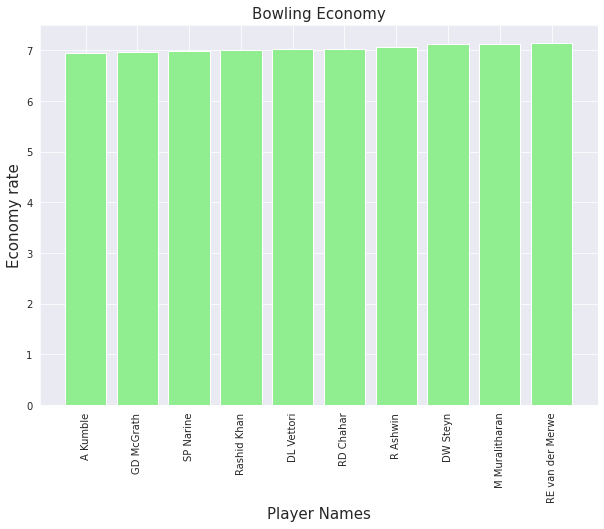

In [ ]:
# creating a figure object for the same

plt.bar(economy_df.head(10)['Bowler'], economy_df.head(10)['Economy'], color = 'lightgreen')
plt.xticks(rotation=90)
plt.title("Bowling Economy" , fontsize = 15)
plt.xlabel("Player Names" , fontsize = 15)
plt.ylabel("Economy rate" , fontsize = 15)


### Most number of no balls delivered

In [ ]:
# getting bowlers who bowled most number of no balls

most_no_balls =  deliveries_df.groupby(['bowler'], as_index=False)['noball_runs'].sum().sort_values(by=['noball_runs'], ascending=False)
most_no_balls.head()

,bowler,noball_runs
321,S Sreesanth,27
153,JJ Bumrah,23
130,I Sharma,21
340,SL Malinga,20
7,A Mishra,20


Text(0, 0.5, 'Number of no balls')

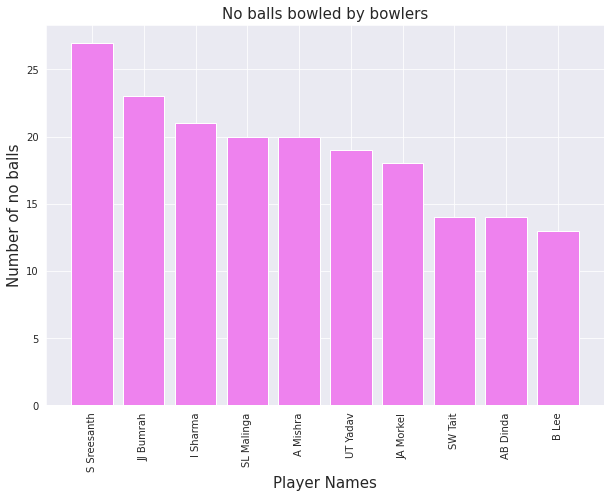

In [ ]:
plt.xticks(rotation=90)
plt.bar(most_no_balls.head(10)['bowler'],most_no_balls.head(10)['noball_runs'], color = 'violet')
plt.title("No balls bowled by bowlers" , fontsize = 15)
plt.xlabel("Player Names" , fontsize = 15)
plt.ylabel("Number of no balls" , fontsize = 15)

## Team specific Insights

Now, this is something really interesting, be with us!!

### Luckiest team to win the toss

In [ ]:
matches_df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Chennai Super Kings            89
Sunrisers Hyderabad            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Rising Pune Supergiants        33
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

<BarContainer object of 11 artists>

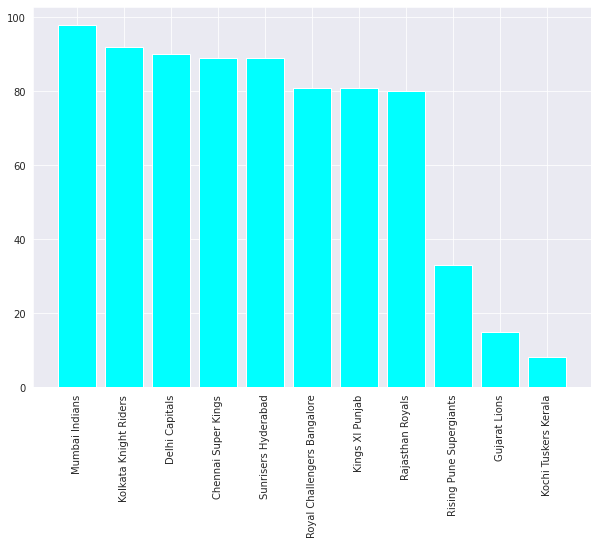

In [ ]:
plt.xticks(rotation=90)
plt.bar(matches_df['toss_winner'].value_counts().index, matches_df['toss_winner'].value_counts(), color = 'aqua')

Mumbai is the luckiest team with the toss!!

### Winning team in each season




In [ ]:
# creating a column for season year
matches_df[['year']] = matches_df['Season'].str.split('-',expand = True)[1]
matches_df['year'] = matches_df['year'].astype(int)

In [ ]:
# Winner per season 
teams_season = pd.DataFrame(matches_df.groupby('year')['winner'].value_counts())
teams_season['winner']

year  winner                     
2008  Rajasthan Royals               13
      Kings XI Punjab                10
      Chennai Super Kings             9
      Delhi Capitals                  7
      Mumbai Indians                  7
                                     ..
2019  Kings XI Punjab                 6
      Kolkata Knight Riders           6
      Sunrisers Hyderabad             6
      Rajasthan Royals                5
      Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [ ]:
# winner percentage

team1_count = pd.DataFrame(matches_df.groupby('year')['team1'].value_counts())
team2_count = pd.DataFrame(matches_df.groupby('year')['team2'].value_counts())
# result_df = team_count.sort_values(by = team_count.team1) 
result_df = pd.concat([team1_count,team2_count],axis = 1)
df = result_df['team1']+result_df['team2']
df
total = pd.concat([result_df,df],axis = 1) 



In [ ]:
# winner percentage
win_season = pd.concat([total,teams_season], axis  = 1)
win_season
win_percent= win_season['winner']/win_season[0]*100
win_percentage = pd.concat([win_season,win_percent],axis = 1) 
win_percentage.columns = ['team1','team2','total matches','matches won','win percent']

In [ ]:
# Percent of matches won by each team in all the seasons from IPL 2008 to IPL 2019
win_percentage


team1  team2  ...  matches won  win percent
2008 Chennai Super Kings              9      7  ...            9    56.250000
     Delhi Capitals                   6      8  ...            7    50.000000
     Kings XI Punjab                  7      8  ...           10    66.666667
     Kolkata Knight Riders            9      4  ...            6    46.153846
     Mumbai Indians                   6      8  ...            7    50.000000
...                                 ...    ...  ...          ...          ...
2019 Kolkata Knight Riders            9      5  ...            6    42.857143
     Mumbai Indians                  10      6  ...           11    68.750000
     Rajasthan Royals                 5      9  ...            5    35.714286
     Royal Challengers Bangalore      9      5  ...            5    35.714286
     Sunrisers Hyderabad              8      7  ...            6    40.000000

[100 rows x 5 columns]

In [ ]:
# Winner in all seasons
year = 2008
win_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for item,item2 in teams_season.iterrows():    
  
  if item[0]==year:
    
    win_df = pd.DataFrame({'year':[item[0]],'team':[item[1]],'wins':[item2[0]]})
    win_season_df = win_season_df.append(win_df)
    year+=1
win_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Capitals,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


### Number of seasons won by each team

In [ ]:
number_of_seasons_won = pd.DataFrame(win_season_df["team"].value_counts())
number_of_seasons_won.reset_index(level = 0, inplace = True)
number_of_seasons_won.columns= ['team','number of seasons']
number_of_seasons_won

,team,number of seasons
0,Mumbai Indians,4
1,Chennai Super Kings,3
2,Kings XI Punjab,1
3,Rajasthan Royals,1
4,Kolkata Knight Riders,1
5,Sunrisers Hyderabad,1
6,Delhi Capitals,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


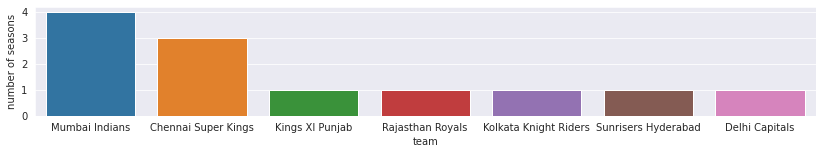

In [ ]:
fig_dims = (14, 2)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('darkgrid')
sns.barplot(number_of_seasons_won["team"],number_of_seasons_won["number of seasons"],ax=ax, data=number_of_seasons_won)
plt.show()

### Teams who batted first and won

In [ ]:
batted_first = matches_df[matches_df["win_by_runs"] != 0].reset_index().drop("index" , axis = 1) # win_by_runs already in int type
batted_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017
2,9,IPL-2017,Pune,11-04-2017,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,2017
3,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN,2017
4,15,IPL-2017,Delhi,15-04-2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN,2017


In [ ]:
# Teams who batted first and won

batted_first["winner"].value_counts() # with Mumbai Indians on the top

Mumbai Indians                 57
Chennai Super Kings            52
Sunrisers Hyderabad            48
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Delhi Capitals                 28
Rajasthan Royals               27
Rising Pune Supergiants        13
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

*Woahhh! seems like if Mumbai Indians elected to bat first, the other team is going HOME!!!*

### Most consistent team

In [ ]:
# again let's get list of all the teams
teams = list(set(list(matches_df['team1']) + list(matches_df['team2'])))
print(teams)

['Kochi Tuskers Kerala', 'Delhi Capitals', 'Rising Pune Supergiants', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Gujarat Lions', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad', 'Mumbai Indians', 'Kings XI Punjab']


In [ ]:
# creating a dictionary for each team where matches played would be the values
matches_played = {team:0 for team in teams}

In [ ]:
# for total matches played
# we need to count team name as first team and second team
print(matches_df['team1'].value_counts())

for team in teams:
    matches_played[team] += matches_df['team1'].value_counts()[team]

Sunrisers Hyderabad            106
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Rising Pune Supergiants         35
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64


In [ ]:
# doing the same for column team_2 as well
print(matches_df['team2'].value_counts())

for team in teams:
    matches_played[team] += matches_df['team2'].value_counts()[team]

Delhi Capitals                 99
Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Sunrisers Hyderabad            77
Chennai Super Kings            75
Rising Pune Supergiants        41
Gujarat Lions                  16
Kochi Tuskers Kerala            7
Name: team2, dtype: int64


In [ ]:
# let's get the no of matches won by each team
matches_won = matches_df['winner'].value_counts()

print(matches_won)

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


Here we're talking about a team being consistent.

So, we are considering only those teams which have played more than 30 matches.

In [ ]:
# now getting the percentage of matches won
# and storing them in a new list

won_per = []

for team in teams:
    if matches_played[team]>30:
        won_per.append(round(matches_won[team]/matches_played[team]*100, 2))
    else:
        won_per.append(0)

In [ ]:
for team, win_per in zip(teams, won_per):
    print(f'{team} : {win_per}')

Kochi Tuskers Kerala : 0
Delhi Capitals : 43.5
Rising Pune Supergiants : 35.53
Kolkata Knight Riders : 51.69
Chennai Super Kings : 60.98
Gujarat Lions : 0
Rajasthan Royals : 51.02
Royal Challengers Bangalore : 46.67
Sunrisers Hyderabad : 47.54
Mumbai Indians : 58.29
Kings XI Punjab : 46.59


Text(0, 0.5, 'Win percentage')

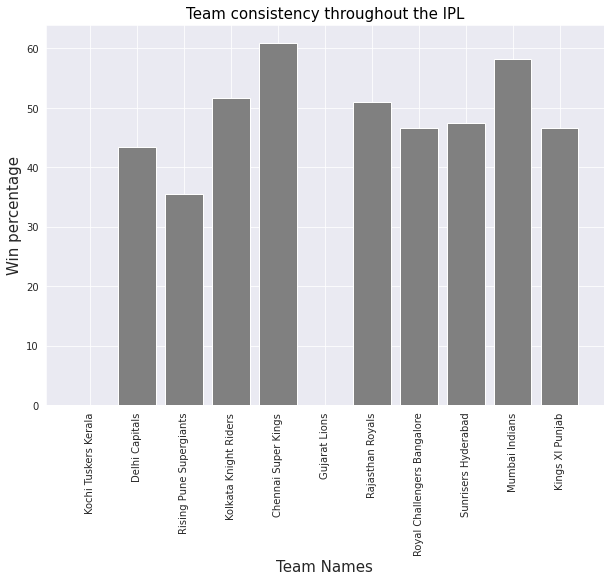

In [ ]:
#getting figure object for same

plt.xticks(rotation=90)
plt.bar(teams, won_per, color = 'grey')
plt.title("Team consistency throughout the IPL" , fontsize = 15 , color = "black")
plt.xlabel("Team Names" , fontsize = 15)
plt.ylabel("Win percentage" , fontsize = 15)

### Best defending team

In [ ]:
# getting max frequency of team which won by win by runs (as win by run will imply defending and getting mode of the team will tell which team defended most number of times)

matches_df[matches_df["win_by_runs"] != 0]["winner"].mode()

0    Mumbai Indians
dtype: object

*And as Expected, MUMBAI!!*



```
Mumbai won't let their supporters down!!
```



### Best chasing team

In [ ]:
# like we did above for defending we can do the same to get the chasing champion

matches_df[matches_df["win_by_wickets"] != 0]["winner"].mode()

0    Kolkata Knight Riders
dtype: object


`Shahrukh must be happy :D`



# Miscellaneous 

So, this section is consist of all other mixed insights of IPL!!

Be with us !!

### Which season had the most number of IPL matches??

So, you must be thinking: "what's big deal in this?"

But, there's a catch here, check the result !!

In [ ]:
# getting number of matches each season

number_of_matches = pd.DataFrame(matches_df["Season"].value_counts())
number_of_matches.reset_index(level = 0, inplace = True)
number_of_matches.columns= ['season','number of matches']
number_of_matches

,season,number of matches
0,IPL-2013,76
1,IPL-2012,74
2,IPL-2011,73
3,IPL-2010,60
4,IPL-2018,60
5,IPL-2019,60
6,IPL-2016,60
7,IPL-2014,60
8,IPL-2017,59
9,IPL-2015,59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


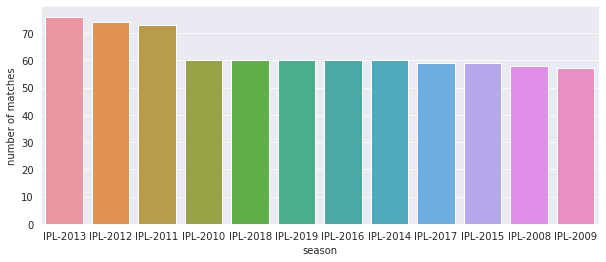

In [ ]:
# creating plot of IPL seasons and number of matches
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('darkgrid')
sns.barplot(number_of_matches["season"],number_of_matches["number of matches"],ax=ax, data=number_of_matches)
plt.show()

Most matches were played in season 2011, 2012, 2013 and for other seasons, it's almost same number of matches!!

There must be some reason:


*   As far as I know, during these seasons there were 9 or 10 playing teams and hence contributing to more number of matches than other seasons


*Let's check whether this statement is supported by our dataset or not!*

In [ ]:
# creating a count df that includes both aspects that we are going to validate

count = matches_df[matches_df["Season"].isin(["IPL-2008" , "IPL-2011", "IPL-2012", "IPL-2013", "IPL-2016", "IPL-2018", "IPL-2019"])]
count.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year
59,60,IPL-2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,2008
60,61,IPL-2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2008
61,62,IPL-2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,2008
62,63,IPL-2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,2008
63,64,IPL-2008,Kolkata,20-04-2008,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,2008


In [ ]:
# Checking count of teams in season 2012

len(count[count["Season"] == "IPL-2012"]["team1"].value_counts())

9

In [ ]:
# checking count of teams in season 2011

len(count[count["Season"] == "IPL-2011"]["team1"].value_counts())

10

In [ ]:
# 2013
len(count[count["Season"] == "IPL-2013"]["team1"].value_counts())

9

In [ ]:
# 2008
len(count[count["Season"] == "IPL-2008"]["team1"].value_counts())

8

In [ ]:
# 2018
len(count[count["Season"] == "IPL-2018"]["team1"].value_counts())

8

In [ ]:
# 2016
len(count[count["Season"] == "IPL-2016"]["team1"].value_counts())

8

### Top five venues (stadium)

You must be guessing that it should be Wankhede (Mumbai) as Mumbai as a city had hosted most number of matches!!

But again, there is catch here !!

yes, yes! scroll quickly!!

In [ ]:
# getting count of matches against each stadium

venue_of_matches = pd.DataFrame(matches_df["venue"].value_counts())
venue_of_matches.reset_index(level = 0, inplace = True)
venue_of_matches.columns= ['venue','number of matches']

# top 5 venues
venue_of_matches.iloc[:5]

,venue,number of matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


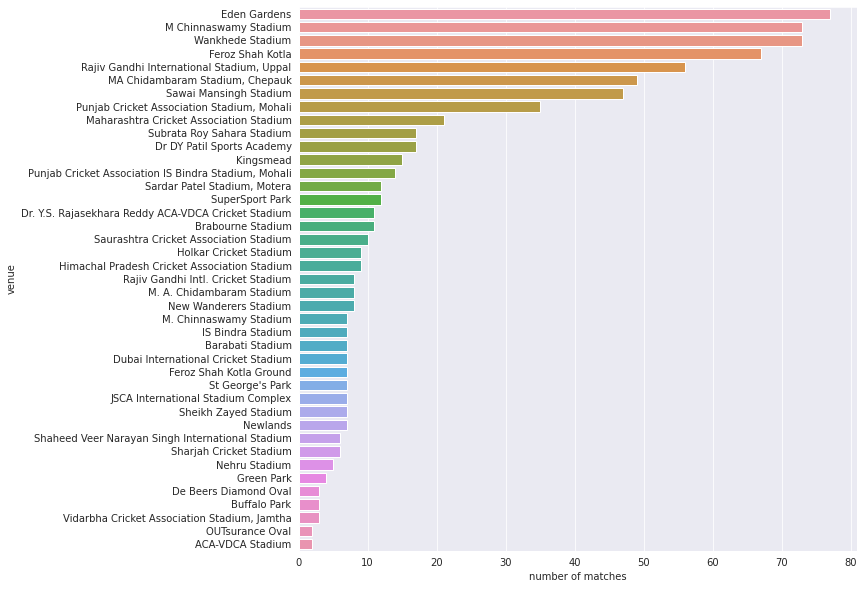

In [ ]:
# Visual representation of IPL seasons and venue of matches
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('darkgrid')
sns.barplot(venue_of_matches["number of matches"],venue_of_matches["venue"],ax=ax, data=number_of_matches)
plt.show()

**Here's the interesting thing coming out of it:**


*  Mumbai has hosted most number of the matches as we saw above "BUT" Wankhede is not at the top.
*  Eden Gardens is in the top which is in Kolkata.
* Our data is not telling us what we expected.
* But simple reason for this is Mumbai has more number of stadiums(one of which is DY Patil Stadium other than Wankhede)
* When we combine for both we will get (73 + 17 = 90). Now, this statisfies the fact that Mumbai hosted the most number of matches!!

### Home Wins and Away Wins Of The teams


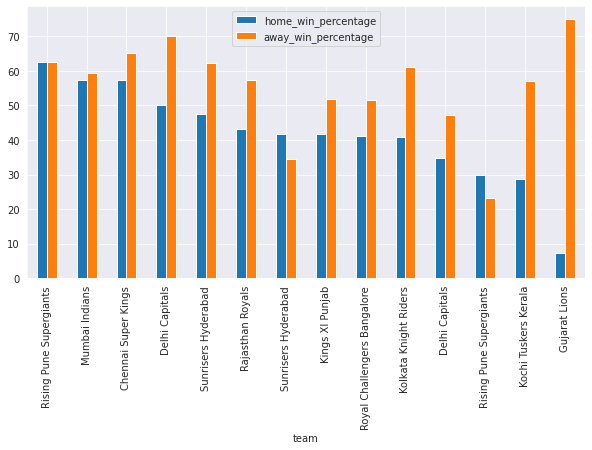

In [ ]:
# Home win percentage and away win percentage for various teams
teamwise_home_and_away_df.plot(x = 'team', y = ['home_win_percentage','away_win_percentage'], kind ='bar',width = 0.5,figsize=(10,5))

 Gujarat Lions has more away win percentage and least home win, while Rising Pune Supergiants has maximum home wins and equally away wins. This data can help expect the outcome of a match depending on home or away match..

### How overs play a crucial role

In [ ]:
#creating a function which will return a flaot value of wicket which can be usefull for us
def get_wicket(dismisal):
  if dismisal  :
    return 1
 

In [ ]:
deliveries_df["wicket"] = deliveries_df[~deliveries_df['player_dismissed'].isna()]["player_dismissed"].apply(get_wicket)
deliveries_df[~deliveries_df["wicket"].isna()].head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh,1.0
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,0,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby,1.0


In [ ]:

deliveries_df[deliveries_df['is_super_over']!=0].tail(2)

# by exploring we find out it will have only one over which is bowled that will create wrong information about the data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
127368,536,4,Rajasthan Royals,Kings XI Punjab,1,3,SPD Smith,JP Faulkner,MG Johnson,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN,NaN
127369,536,4,Rajasthan Royals,Kings XI Punjab,1,4,JP Faulkner,SPD Smith,MG Johnson,1,0,0,0,0,0,0,0,0,JP Faulkner,run out,NaN,1.0


In [ ]:
# we are going to remove the data of superover as we are more focused on matches overs

wicketper_over_df_1 = deliveries_df.groupby("over").sum('wickets').reset_index()
wicketper_over_df_1

,over,match_id,inning,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,wicket
0,1,17111970,14598,35259,81,539,52,248,32,0,8535,871,9406,306.0
1,2,16735202,14248,34880,0,489,40,262,32,0,10139,823,10962,350.0
2,3,16764234,14122,34273,0,392,42,231,40,0,11413,705,12118,371.0
3,4,16678664,14062,34004,0,340,22,230,46,0,11769,638,12407,385.0
4,5,16621283,13997,33794,0,322,32,177,34,5,11856,570,12426,385.0
5,6,16492607,13966,33754,0,332,41,227,47,0,11865,647,12512,380.0
6,7,16450119,13895,33525,0,362,22,200,23,0,9476,607,10083,308.0
7,8,16434386,13858,33317,0,300,22,173,27,0,10215,522,10737,324.0
8,9,16431313,13814,33289,0,295,44,172,20,0,10596,531,11127,369.0
9,10,16480392,13728,32966,0,269,57,153,24,0,10484,503,10987,338.0


***Now  with the help of seaborn heatmap lets find out the co-relation in this data***

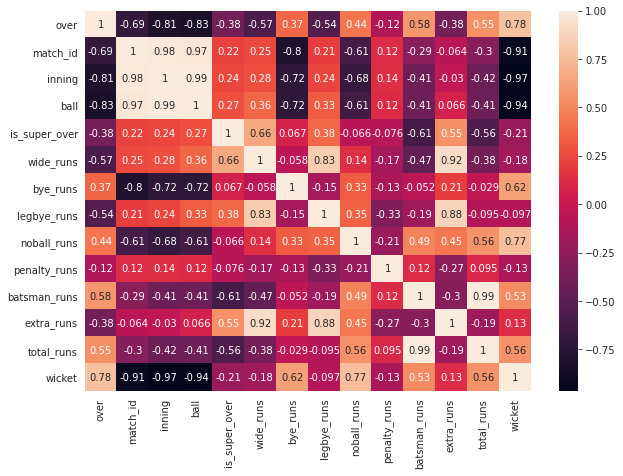

In [ ]:
# using seaborn heatmap
corr = wicketper_over_df_1.corr()
# use annot for labeling because without it only the color will be visible 
sns.heatmap(corr,annot = True)

while looking at this heat map  we can see a high corelation between match_id, innings, balls


But match id ,innings ,ball are just for representation purpose ( *numerical values for better understanding and finding out detail of pertiular match*) they dont have any relation to the match  played so it would be better to remove all such columns.

In [ ]:
# creating new dataframe without unwanted columns
wicketper_over_df = wicketper_over_df_1[['over',   'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 
       'batsman_runs', 'extra_runs', 'total_runs', 'wicket']]
wicketper_over_df.head(2)

,over,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,wicket
0,1,539,52,248,32,8535,871,9406,306.0
1,2,489,40,262,32,10139,823,10962,350.0


Now lets see and find out the correlation in new data frame


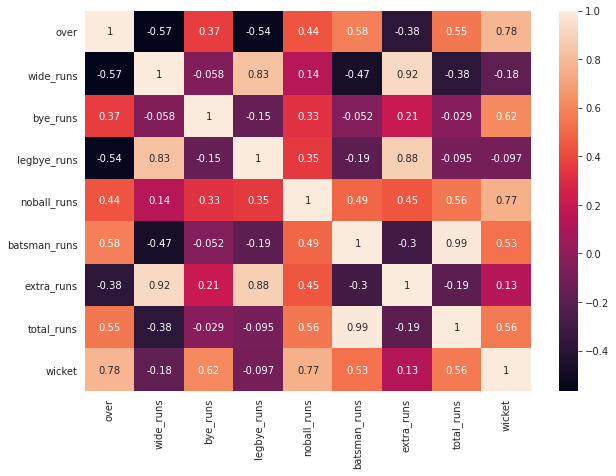

In [ ]:
sns.heatmap(wicketper_over_df.corr(),annot = True)

we also see there are few columns which are highly co-related to each other such as 

*   extra_runs columns have postive co-relation with wide_runs, legbye_runs, bye_runs
*   wickets fall have a postive co-relation with over 



**Now lets explore these  co-realtion  with the help of other visualization tools for better understanding of co-relation**

Lets start by  creating some sub plots for side by side comparision of Total run scored and wickets fall with respect to each over 

Text(0.5, 1.0, 'No of wicket taken in each over in IPL')

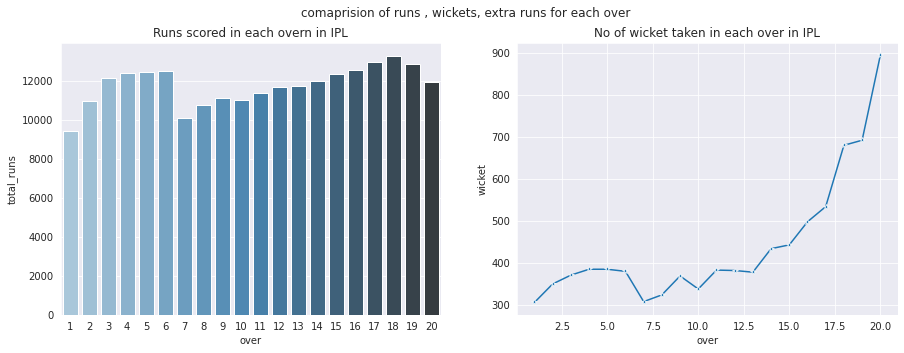

In [ ]:
# setting background to dark grid for better visualization
# by using set style
sns.set_style("darkgrid")

# figuring out the layout of subplot
# using figsize to control the size of the subpolot
fig , axes= plt.subplots(1,2, figsize = (15,5))

# giving title to the subplot
fig.suptitle ('comaprision of runs , wickets, extra runs for each over')
sns.barplot(ax= axes[0],data = wicketper_over_df,x='over',y="total_runs",palette="Blues_d").set_title("Runs scored in each overn in IPL")

# creating scatter plot of wickiet fall in each over
sns.lineplot(ax= axes[1],data= wicketper_over_df,x="over",y="wicket",marker="*").set_title("No of wicket taken in each over in IPL")



By looking at these graphs we can conclude that   in process of scorring more runs at the end of innings teams also looses wickets.

*And this thing is true as we have seen in IPl, how team don't care about the wickets at end of innings they are more concern about runs*

***Lets have a look at how extra runs behave as inings progress in IPL***

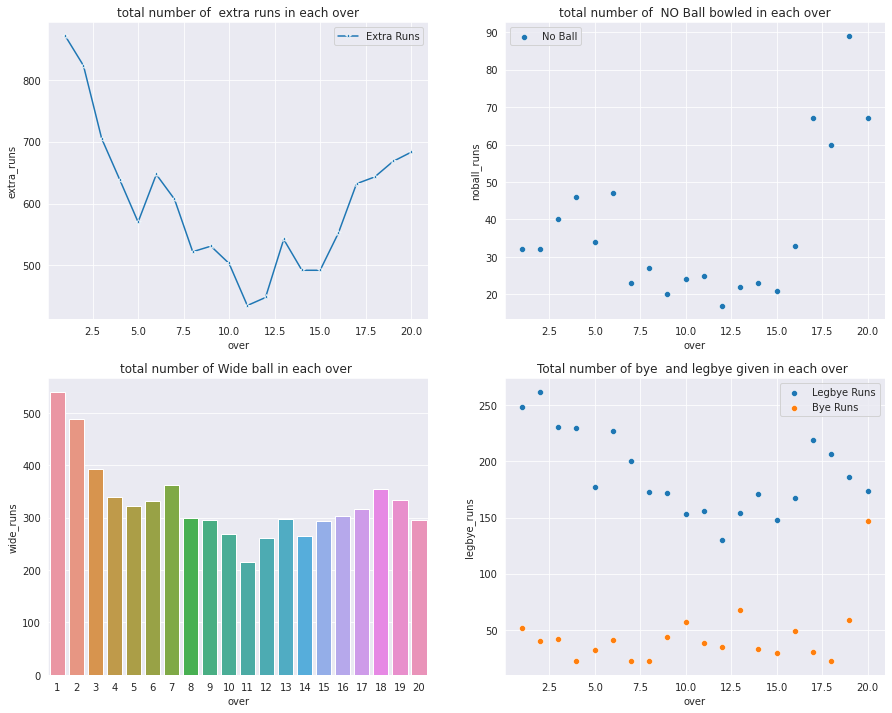

In [ ]:
# setting the background
sns.set_style("darkgrid")

# figuring out the layout of subplots
fig ,axes= plt.subplots(2,2 ,figsize= (15,12))


sns.lineplot(ax=axes[0,0],data = wicketper_over_df,x="over",y="extra_runs",marker = "*",label="Extra Runs").set_title("total number of  extra runs in each over")
sns.scatterplot(ax =axes[0,1],data = wicketper_over_df,x="over",y= "noball_runs",legend="full",label ="No Ball").set_title("total number of  NO Ball bowled in each over")
sns.barplot(ax= axes[1,0],data = wicketper_over_df,x="over",y="wide_runs", label= "Wide Ball").set_title("total number of Wide ball in each over ")
sns.scatterplot(ax = axes[1,1],data = wicketper_over_df,x="over",y="legbye_runs",label ="Legbye Runs").set_title("Total number of bye  and legbye given in each over ")
sns.scatterplot(ax= axes[1,1], data = wicketper_over_df,x="over",y ="bye_runs",legend= "full",label ="Bye Runs")
plt.legend()


*its clearly visible in the graphs in first sub plot that bowler have given more extra in initial stage of the the match when at the end* 

By seeing all the graphs in subplot we notice one thing that majority part of extra is in form of wides and leg bye and that is true as in start of innings batsman and bowlers are more focused on judging the behaviour of pitch.   

If we look at **NO ball graph** we can see most of the no ball are bowled at end of the inngs so by this we can conclude that bowlers are **putting more efforts at end that could led to oversteping and hence no ball***

One more thing which we can see from these graphs is the major contributor to exta runs are wide balls and leg byes

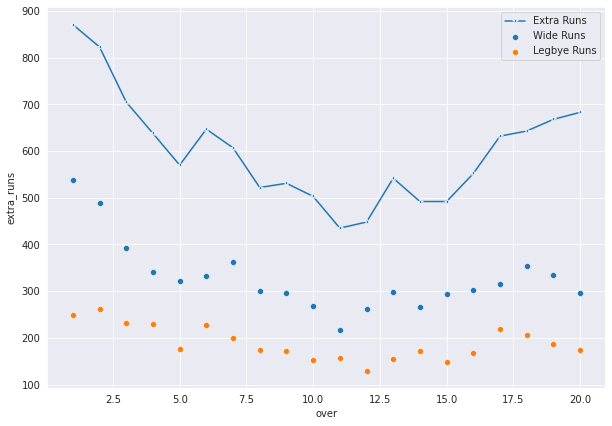

In [ ]:
# creating a graphs to compare extra runs , wide and legbye
#creating line plot for extra runs
sns.lineplot(data=wicketper_over_df,x="over",y='extra_runs', marker="*",label ="Extra Runs")
sns.scatterplot(data=wicketper_over_df,x="over",y='wide_runs',label ="Wide Runs" )
sns.scatterplot(data=wicketper_over_df,x="over",y='legbye_runs',label ="Legbye Runs")
plt.legend()


By all  these graphs we can easily viasualize the relation between the extra runs and total 

### Umpires

Whattt?? Umpires?? 

Yes!!

Whenever we say there is match going on most of the people start searching for there favourite players.
As they know that a particular player can turn the match in his team favour at any time.
but players are not the only one which turn the matches as we have seen in IPL that there are many matches which turned by the decision given by umpires!! 

So, have a look at findings of umpires!!




Here , I will tell u the most experienced umpire in the history of IPL!!

In [ ]:
# this gives us series  of  umpires indivisually 
# as there are 3 umpire in match 
umpire_1 = matches_df["umpire1"]
umpire_2 = matches_df["umpire2"]
umpire_3 = matches_df["umpire3"]

# concat these series row wise with axis=0
final_umpire = pd.concat([umpire_1,umpire_2,umpire_3])
umpire = final_umpire.value_counts().sort_values(ascending = False)
umpire = pd.DataFrame(umpire).reset_index()
umpire.rename(columns = {"index":"umpire_name",0:"total_matches"},inplace =True)

umpire.style.background_gradient()
umpire.head(5)

,umpire_name,total_matches
0,S Ravi,114
1,HDPK Dharmasena,87
2,C Shamshuddin,83
3,AK Chaudhary,58
4,SJA Taufel,55


This gives us that **S Ravi** is the most experienced umpire in histry of the IPL

Now with the help of bar plot we can see where does other umpire stand

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


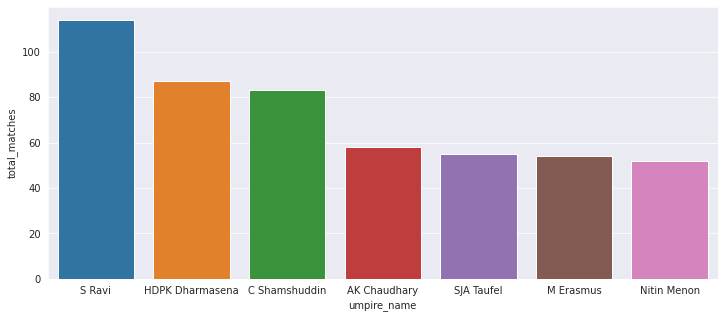

In [ ]:
# Now lets Plots a bar plot which will represent the umpires experience

fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('darkgrid')
sns.barplot(umpire["umpire_name"][0:7],umpire["total_matches"][0:7],ax=ax, data=umpire)

# by doing this will show only graph and not the additional things
plt.show()


In [ ]:
# lets start by grouping matches_df dataframe with season and th
ipl_df = matches_df.groupby("Season")

In [ ]:
# start by finding dataframe from each season
for seasons,seasons_df in ipl_df:
  print(seasons)
  win_per_season = seasons_df["winner"].value_counts()
  print(win_per_season)


IPL-2008
Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Mumbai Indians                  7
Delhi Capitals                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Sunrisers Hyderabad             2
Name: winner, dtype: int64
IPL-2009
Delhi Capitals                 10
Royal Challengers Bangalore     9
Sunrisers Hyderabad             9
Chennai Super Kings             8
Kings XI Punjab                 7
Rajasthan Royals                6
Mumbai Indians                  5
Kolkata Knight Riders           3
Name: winner, dtype: int64
IPL-2010
Mumbai Indians                 11
Chennai Super Kings             9
Royal Challengers Bangalore     8
Sunrisers Hyderabad             8
Kolkata Knight Riders           7
Delhi Capitals                  7
Rajasthan Royals                6
Kings XI Punjab                 4
Name: winner, dtype: int64
IPL-2011
Chennai Super Kings            11
Royal Challengers Bangalore    10

### Each batsman performance throughout the IPL!!

This will give you some insights of your favorite batsman, i guess!! That how he performed throughout the IPL.

We will be using deliveries and matches csv to get the same!!

In [ ]:
# gouping by on match_id , inning & batsman and then agg on batsman runs (sum)

bats = deliveries_df.groupby(["match_id" , "inning" , "batsman"])["batsman_runs"].sum()
batsman_df = bats.reset_index()
batsman_df.head()

NameError: ignored

In [ ]:
# creating separate df for id, season

id_season = matches_df[["id" , "Season"]]
id_season.head()

In [ ]:
# performing left join on id season
bats_df = id_season.merge(batsman_df , left_on = "id" , right_on = "match_id" , how = "left")
bats_df.head()


In [ ]:
# dropping id now as match_id is there now in our df

bats_df.drop("id" , inplace=True , axis = 1)
bats_df.head()

In [ ]:
# now again performing groupby on batsman and season to get the runs by batsman each season by performing agg on batsman runs

batsman_runs_per_season = bats_df.groupby(["Season" , "batsman"])["batsman_runs"].sum().reset_index()
batsman_runs_per_season = bats_df.groupby(["Season" , "batsman"])["batsman_runs"].sum().unstack().T
batsman_runs_per_season["total_runs"] = batsman_runs_per_season.sum(axis = 1)
top5_batsman = batsman_runs_per_season.sort_values(by="total_runs" , ascending= False)[0:5]
top5_batsman


In [ ]:
# plotting the run distribution for each season by top 5 run scorers

# batsman_runs_per_season.sort_values(by="total_runs" , ascending= False)[0:5].T.plot(kind = "line")

top5_batsman.drop("total_runs" , axis = 1).T.plot(kind="line")
plt.title("Top 5 batsman runs distribution for each IPL season" , fontsize = "15" , weight = "bold")
plt.xlabel("IPL Seasons" , fontsize = "15" , weight = "bold")
plt.ylabel("Runs" , fontsize = "15" , weight = "bold")
plt.xticks(weight = "bold")
plt.yticks(weight = "bold")



### Common margin of runs with which any team defeated their opponent

In [ ]:
# getting season wise win by runs distribution

win_runs = matches_df[matches_df["win_by_runs"] != 0][["Season" , "win_by_runs"]].sort_values(by="win_by_runs" , ascending = False)
win_runs.head()

,Season,win_by_runs
43,IPL-2017,146
619,IPL-2016,144
59,IPL-2008,140
556,IPL-2015,138
410,IPL-2013,130


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text major ticklabel objects>)

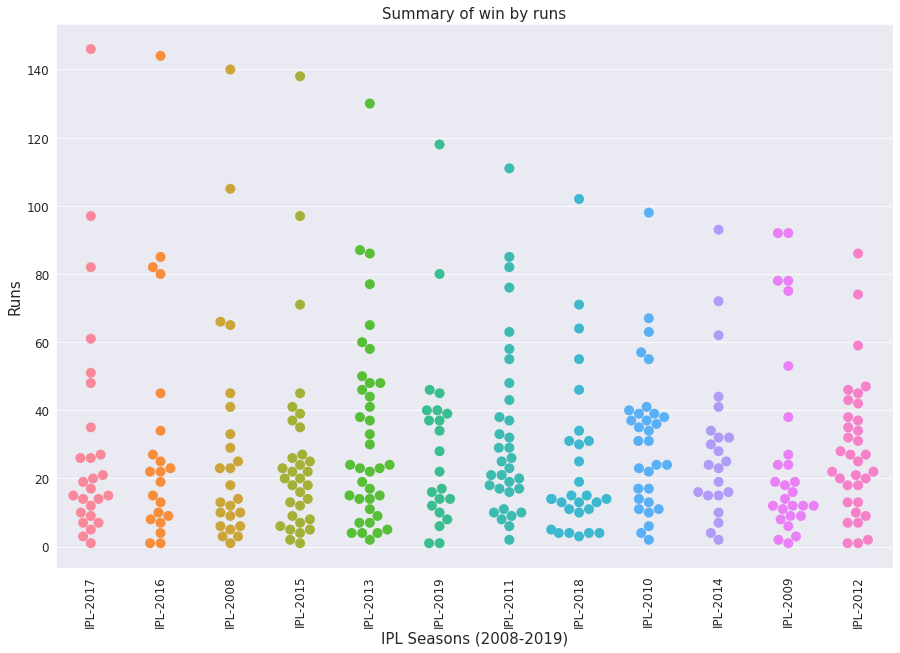

In [ ]:
# We can use the swarmplot too using seaborn library (somewhat similar to scatterplot or stripplot , only thing is datapoints are clear in swarmplot, they are not overlapping)
# creating swarmplot

plt.gcf().set_size_inches(15, 10)
sns.swarmplot(win_runs["Season"] , win_runs["win_by_runs"] , size = 10)
plt.title("Summary of win by runs" , fontsize = 15)
plt.xlabel("IPL Seasons (2008-2019)" , fontsize = 15)
plt.ylabel("Runs" , fontsize = 15)
plt.xticks(rotation = "vertical" , fontsize = 12)
plt.yticks(fontsize = 12)

*As we can see above most of the matches were won with the runs in between 15 to 40 and the runs above 80's are outliers here!!*

###Distribution of runs made in an inning per Season

In [ ]:
runs_per_inning = deliveries_df.groupby(['match_id','inning'], as_index=False)['total_runs'].sum()

runs_per_inning.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [ ]:
# we also need a column for season in the runs_per_inning dataframe
# let's make a dictionary of match_id to season from match dataset

id_to_season = {id:season for id, season in zip(list(matches_df['id']), list(matches_df['Season']))}

# make a function to apply on runs_per_season
def season_column(col):
    return id_to_season[col]

In [ ]:
runs_per_inning['Season'] = runs_per_inning['match_id'].apply(season_column)

In [ ]:
runs_per_inning.head()

,match_id,inning,total_runs,Season
0,1,1,207,IPL-2017
1,1,2,172,IPL-2017
2,2,1,184,IPL-2017
3,2,2,187,IPL-2017
4,3,1,183,IPL-2017


In [ ]:
# check if we got all the seasons
runs_per_inning['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


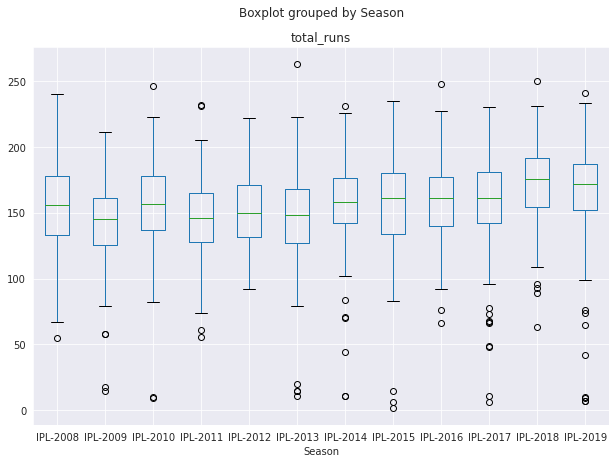

In [ ]:
runs_per_inning.boxplot(column='total_runs', by='Season', figsize=(10,7))

So it's evident that most of the high scores were made in 2018

# Conclusions:


1.   Season 2011-13 had most number of matches as number of teams were 9-10 in those seasons.
2.   Eden gardens hosted the maximum number of IPL matches. (This could be Wankhede but as Mumbai had matches in other stadium as well)
3.   Chris Gayle lifted the maximum number of MOM (Man of the match) trophy. He also holds the record of the maximum centuries till 2019.
4.   Mumbai Indians beated the opponent with the highest ever margin of runs i.e 146 in IPL history during season 2017.
5.   10-40 were the common margin runs with which any team beated their opponent.
6.   Mumbai Indians had won the maximum number of matches till 2019. Proving that they were/are/will be best always!!
7.   Best chasing team : KKR
8.   Best defending team: Mumbai Indians
9.   Virat Kohli holds the record for maximum number of runs till 2019 followed by Suresh Raina.
10.  If we look at the performance, we get to know that Suresh Raina was the most consistent player throughout the IPL.





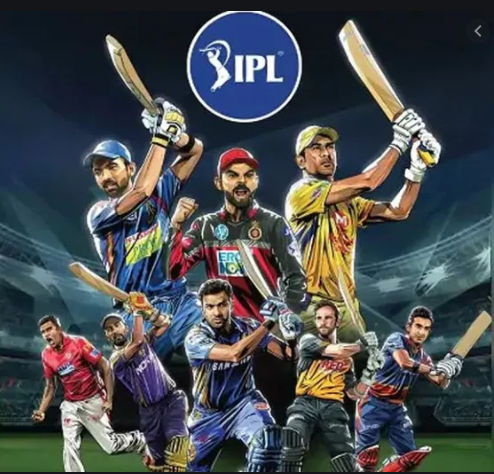